 **1 . IRIS DATASET**

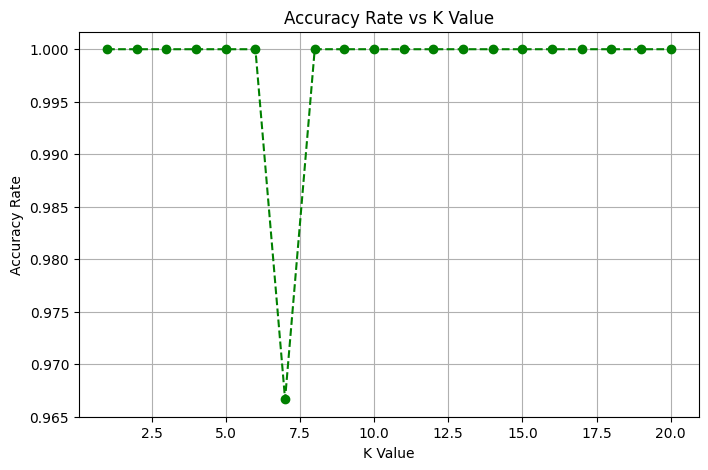

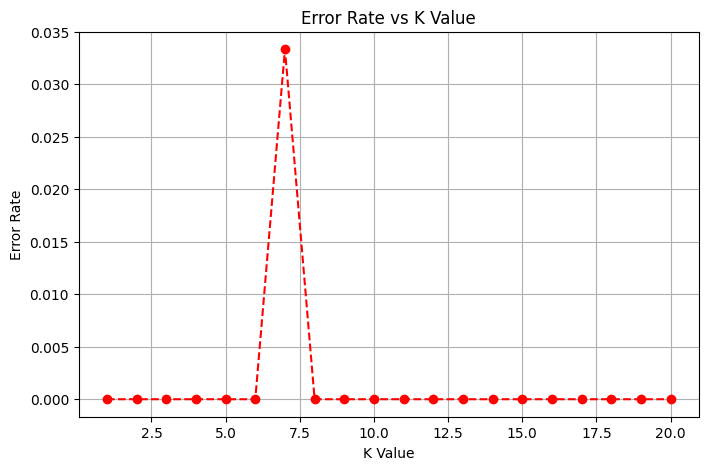

Accuracy Score with k=3: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



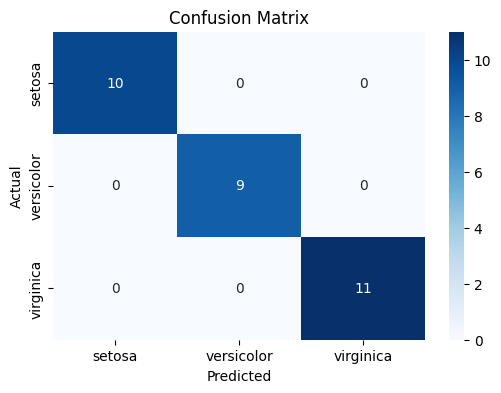

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv('iris (2).csv')

# Split features and target
X = iris.drop('species', axis=1)
y = iris['species']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To store accuracy and error rate for different k values
accuracy_list = []
error_list = []

# Loop for different values of k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    error_list.append(1 - acc)

# Plot Accuracy Rate vs K Value
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy_list, color='green', marker='o', linestyle='dashed')
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.grid()
plt.show()

# Plot Error Rate vs K Value
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), error_list, color='red', marker='o', linestyle='dashed')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

# Now use the best k value (Let's take k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Final Accuracy
print("Accuracy Score with k=3:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**2. DIABETES DATASET**

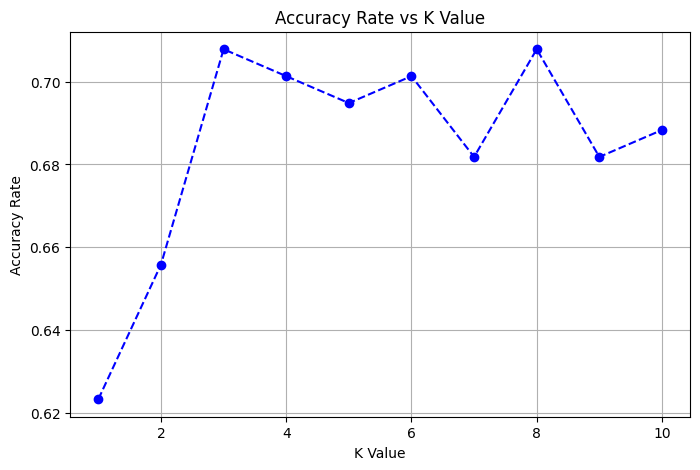

Best K Value is: 3
Accuracy Score: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



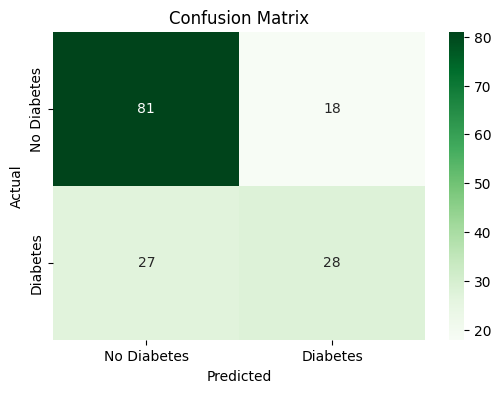

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
diabetes = pd.read_csv('diabetes.csv')

# Features and Target Split
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Accuracy List for k=1 to 10
accuracy_list = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), accuracy_list, marker='o', color='blue', linestyle='dashed')
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.grid()
plt.show()

# Best K Value
best_k = accuracy_list.index(max(accuracy_list)) + 1
print(f"Best K Value is: {best_k}")

# Final Model with Best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**3.HEART DATASET**

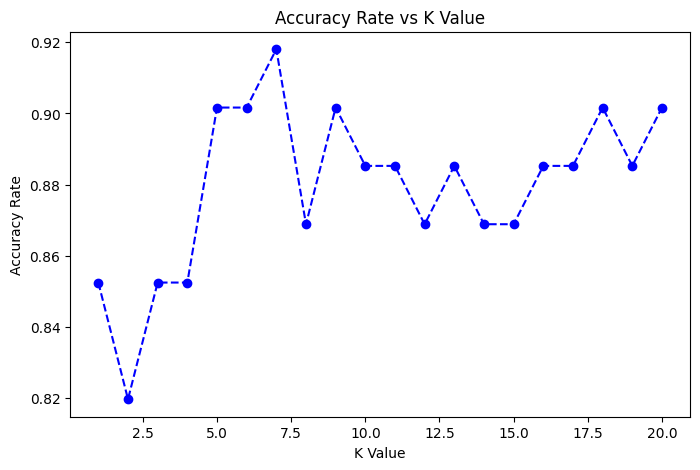

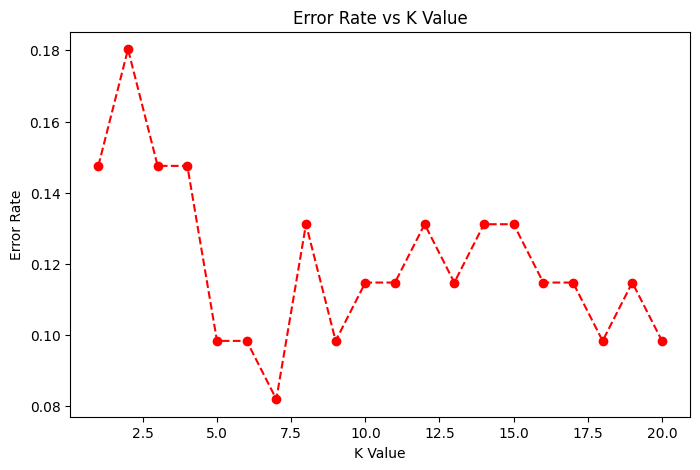

Accuracy Score: 0.9180327868852459

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



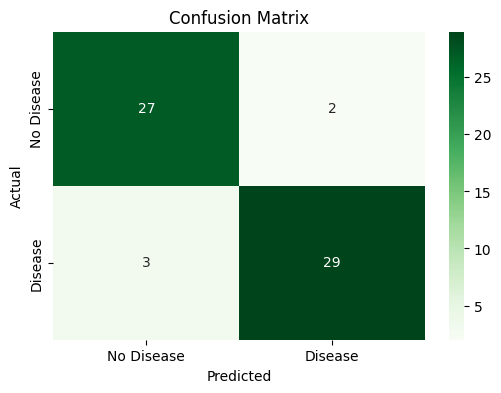

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
heart = pd.read_csv('heart.csv')

# Features and Target
X = heart.drop('target', axis=1)
y = heart['target']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check best k value
accuracy_list = []
error_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    error_list.append(1 - acc)

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracy_list, color='blue', marker='o', linestyle='dashed')
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.show()

# Plot Error Rate vs K
plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_list, color='red', marker='o', linestyle='dashed')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

# Let's choose k=7 (based on graph observation)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
